https://www.cnblogs.com/shangfr/p/5736738.html

In [4]:
library(quantreg)
data(engel)

In [7]:
fit1 = rq(foodexp ~ income, tau = 0.5, data = engel)
r1 = resid(fit1)
c1 = coef(fit1)

In [10]:
summary(fit1)
summary(fit1, se = "boot")


Call: rq(formula = foodexp ~ income, tau = 0.5, data = engel)

tau: [1] 0.5

Coefficients:
            coefficients lower bd  upper bd 
(Intercept)  81.48225     53.25915 114.01156
income        0.56018      0.48702   0.60199


Call: rq(formula = foodexp ~ income, tau = 0.5, data = engel)

tau: [1] 0.5

Coefficients:
            Value    Std. Error t value  Pr(>|t|)
(Intercept) 81.48225 24.17362    3.37071  0.00088
income       0.56018  0.03255   17.21109  0.00000

In [11]:
fit1 = rq(foodexp ~ income, tau = 0.5, data = engel) 
fit2 = rq(foodexp ~ income, tau = 0.75, data = engel)

In [12]:
anova(fit1,fit2) 

Quantile Regression Analysis of Deviance Table

Model: foodexp ~ income
Joint Test of Equality of Slopes: tau in {  0.5 0.75  }

  Df Resid Df F value    Pr(>F)    
1  1      469  12.093 0.0005532 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

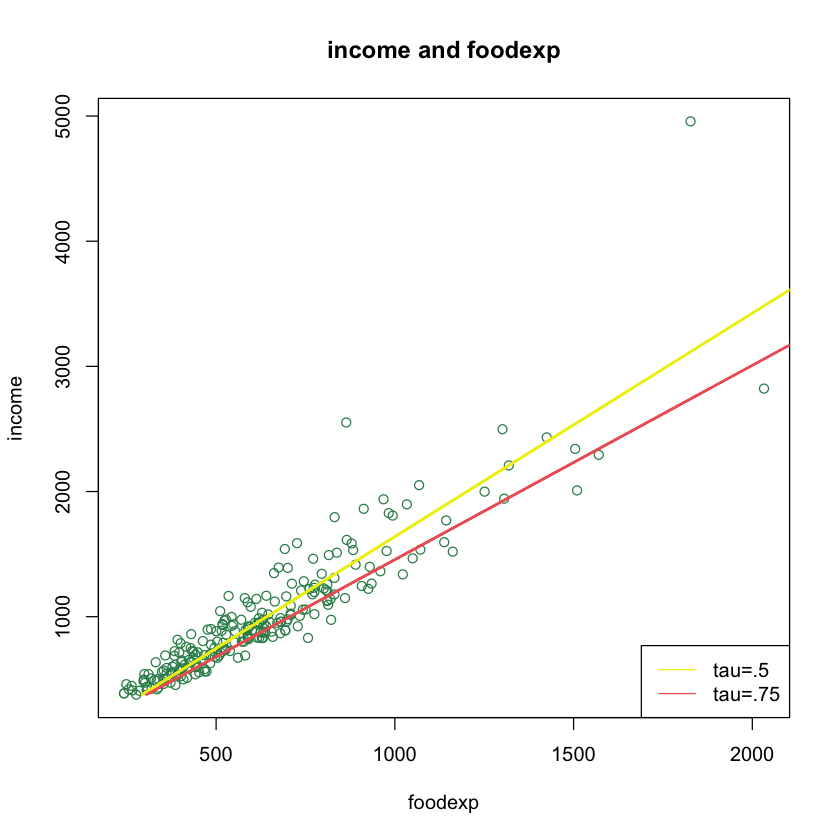

In [19]:
plot(engel$foodexp , engel$income,pch=1, col = "#2E8B57",
     main = "income and foodexp",xlab="foodexp",ylab="income")
lines(fitted(fit1), engel$income,lwd=2, col = "#EEEE00")
lines(fitted(fit2), engel$income,lwd=2, col = "#EE6363")
legend("bottomright", c("tau=.5","tau=.75"), lty=c(1,1),
       col=c("#EEEE00","#EE6363"))